importamos las librerias necesarias

In [1]:
import pandas as pd

C:\Users\Carlos Andres\AppData\Local\Temp\ipykernel_7472\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:


# Cargar el archivo Excel
file_path = 'data/homicidios.xlsx'

# Cargar todas las hojas para tener una visión general de cada una
xls = pd.ExcelFile(file_path)

# Nombres de las hojas disponibles en el archivo
sheet_names = xls.sheet_names
sheet_names


['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas']

# Para comenzar el análisis, hemos identificado que el archivo contiene las siguientes hojas:

- **HECHOS:** Información general sobre los hechos ocurridos, como la hora, la calle, el día, etc.  
- **DICCIONARIO_HECHOS:** Descripción de lo que significa cada variable en la hoja "HECHOS".  
- **VICTIMAS:** Detalles de las víctimas fatales.  
- **DICCIONARIO_VICTIMAS:** Información sobre cada variable relacionada con las víctimas.  
- **clas:** No se mencionó inicialmente, por lo que se investigará brevemente para comprender su relevancia.  

El primer paso será cargar y describir brevemente las hojas ***"HECHOS"*** y ***"VICTIMAS"*** para entender la estructura y los datos que contienen. Luego, revisaremos las hojas de diccionario correspondientes para asegurarnos de comprender cada variable correctamente. La hoja "clas" se explorará brevemente para determinar su relevancia en nuestro análisis.

Vamos a comenzar con la carga de las hojas ***"HECHOS"*** y ***"VICTIMAS"*** para su análisis inicial.

In [4]:
# Cargar las hojas "HECHOS" y "VICTIMAS" para su análisis inicial
hechos_df = pd.read_excel(xls, sheet_name="HECHOS")
victimas_df = pd.read_excel(xls, sheet_name="VICTIMAS")

# Descripción inicial de las hojas "HECHOS" y "VICTIMAS"
hechos_descripcion = hechos_df.describe(include='all')
victimas_descripcion = victimas_df.describe(include='all')

hechos_descripcion, victimas_descripcion


(               ID  N_VICTIMAS                          FECHA         AAAA  \
 count         696  696.000000                            696   696.000000   
 unique        696         NaN                            NaN          NaN   
 top     2016-0001         NaN                            NaN          NaN   
 freq            1         NaN                            NaN          NaN   
 mean          NaN    1.030172  2018-09-14 05:12:24.827586048  2018.188218   
 min           NaN    1.000000            2016-01-01 00:00:00  2016.000000   
 25%           NaN    1.000000            2017-04-02 12:00:00  2017.000000   
 50%           NaN    1.000000            2018-07-12 12:00:00  2018.000000   
 75%           NaN    1.000000            2020-01-04 06:00:00  2020.000000   
 max           NaN    3.000000            2021-12-30 00:00:00  2021.000000   
 std           NaN    0.179393                            NaN     1.683754   
 
                 MM          DD      HORA     HH  \
 count   6

# Análisis Inicial de las Hojas "HECHOS" y "VICTIMAS"  
Hoja **"HECHOS"**  
Número de Registros: 696

### Variables Principales:

ID: Identificador único para cada hecho.
N_VICTIMAS: Número de víctimas involucradas en cada hecho.
FECHA: Fecha en que ocurrió el hecho.
AAAA, MM, DD: Año, mes y día del hecho, respectivamente.
HORA, HH: Hora del hecho. HH parece ser una categorización de la hora.
LUGAR_DEL_HECHO: Descripción del lugar donde ocurrió el hecho.
Observaciones:

Las fechas de los hechos varían desde el 1 de enero de 2016 hasta el 30 de diciembre de 2021.
La mayoría de los hechos tienen 1 víctima, aunque hay casos con hasta 3 víctimas.
Hay una gran variedad en los lugares de los hechos, indicando una amplia distribución geográfica.
Hoja "VICTIMAS"
Número de Registros: 717

Variables Principales:

ID_hecho: Relaciona a la víctima con el hecho en el que estuvo involucrada.
FECHA: Fecha del hecho, coincidiendo con la hoja "HECHOS".
ROL: Rol de la víctima en el hecho (ej., conductor, peatón).
VICTIMA: Tipo de víctima (ej., moto, peatón).
SEXO: Sexo de la víctima.
EDAD: Edad de la víctima.
FECHA_FALLECIMIENTO: Fecha de fallecimiento de la víctima.
Observaciones:

Hay más registros de víctimas que de hechos, indicando que algunos hechos involucraron a múltiples víctimas.
Las víctimas varían en rol, tipo, sexo y edad, proporcionando un conjunto de datos diverso para el análisis.
La variable "EDAD" tiene valores que indican datos faltantes o no especificados (ej., "SD").

Siguientes Pasos:
Unir las Hojas "HECHOS" y "VICTIMAS": Para un análisis integrado, combinaremos estas hojas usando el identificador del hecho.
Limpieza de Datos:
Revisar y tratar valores faltantes, especialmente en las variables clave como "EDAD" y "SEXO".
Verificar la coherencia entre las fechas de los hechos y las fechas de fallecimiento.
Revisión de Outliers: Especial atención a las edades extremadamente altas o bajas, y a la hora de los hechos que podrían ser atípicos.
Análisis Profundo: Explorar las relaciones entre variables, como la hora del día y la incidencia de hechos, tipos de víctimas y roles en relación con el resultado (fallecimiento), entre otros.
Procederemos con la unión de las hojas "HECHOS" y "VICTIMAS" para tener una vista completa de los datos y comenzar la limpieza y análisis detallado.

In [5]:
# Unir las hojas "HECHOS" y "VICTIMAS" en un solo DataFrame para análisis
# Usaremos 'ID' de 'HECHOS' y 'ID_hecho' de 'VICTIMAS' como claves para la unión
datos_completos_df = pd.merge(hechos_df, victimas_df, left_on='ID', right_on='ID_hecho')

# Revisar las primeras filas del DataFrame resultante para asegurar una unión correcta
datos_completos_df.head()


,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


La unión de las hojas "HECHOS" y "VICTIMAS" ha sido exitosa, generando un conjunto de datos combinado que nos permite analizar la relación entre los hechos ocurridos y las víctimas involucradas. Este DataFrame combinado incluye información detallada sobre cada hecho, como la fecha, hora, lugar, y detalles específicos de cada víctima, incluyendo su rol, tipo de vehículo involucrado (si aplica), sexo, edad, y fecha de fallecimiento.

Observaciones Iniciales:  
Cada registro en el DataFrame combinado representa una víctima específica asociada a un hecho, proporcionando una vista integral del incidente.  
Contamos con variables duplicadas como las fechas y años separados por el hecho y la víctima, lo cual es redundante y podría simplificarse en el análisis.  
La columna FECHA_FALLECIMIENTO tiene valores "SD" (sin datos), lo que indica la necesidad de manejar valores faltantes o no especificados.  
Siguientes Pasos para la Limpieza de Datos:  
Simplificar el DataFrame: Eliminar columnas redundantes y clarificar nombres de columnas para facilitar el análisis.  
Manejar Valores Faltantes: Identificar y decidir cómo tratar los valores faltantes o no especificados, especialmente en columnas críticas como EDAD y FECHA_FALLECIMIENTO.  
Corrección de Tipos de Datos: Asegurar que las columnas tengan el tipo de datos adecuado para el análisis, por ejemplo, convertir fechas a un formato de fecha si es necesario.  
Procederemos con la limpieza y preparación del conjunto de datos para el análisis.  

In [6]:
# Simplificar el DataFrame eliminando columnas redundantes y renombrando algunas para claridad
datos_limpios_df = datos_completos_df.drop(columns=['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'ID_hecho'])
datos_limpios_df = datos_limpios_df.rename(columns={
    'FECHA_x': 'FECHA',
    'AAAA_x': 'AAAA',
    'MM_x': 'MM',
    'DD_x': 'DD',
    'VICTIMA_y': 'VICTIMA'
})

# Corrección de tipos de datos
# Convertir FECHA_FALLECIMIENTO a tipo de dato fecha, manejando "SD" como NaT (Not a Time)
datos_limpios_df['FECHA_FALLECIMIENTO'] = pd.to_datetime(datos_limpios_df['FECHA_FALLECIMIENTO'], errors='coerce')

# Verificar y manejar valores faltantes, especialmente para 'EDAD' y 'FECHA_FALLECIMIENTO'
# Reemplazar 'SD' en 'EDAD' por NaN para un tratamiento uniforme de datos faltantes
datos_limpios_df['EDAD'] = pd.to_numeric(datos_limpios_df['EDAD'], errors='coerce')

# Verificación inicial de valores faltantes
valores_faltantes = datos_limpios_df.isnull().sum()

valores_faltantes


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA_x                  0
ACUSADO                    0
ROL                        0
VICTIMA                    0
SEXO                       0
EDAD                      53
FECHA_FALLECIMIENTO       68
dtype: int64

Limpieza y Preparación de Datos  
Después de simplificar el conjunto de datos y realizar la corrección inicial de tipos de datos, hemos identificado los siguientes puntos claves en relación con los valores faltantes y las áreas que requieren atención:

Valores Faltantes:  
La columna Altura tiene 584 valores faltantes, lo que sugiere que para muchos hechos no se especificó este detalle.  
La columna Cruce tiene 177 valores faltantes, indicando que no todos los hechos ocurrieron en intersecciones o cruces.  
Dirección Normalizada y Calle tienen valores faltantes menores, lo que podría afectar la precisión geográfica pero no es crítico para el análisis general.  
EDAD tiene 53 valores faltantes, lo que indica la falta de esta información en algunas víctimas.  
FECHA_FALLECIMIENTO tiene 68 valores faltantes, reflejando casos donde no se registró la fecha de fallecimiento o las víctimas no fallecieron como resultado directo del hecho.  
Estrategia de Manejo de Valores Faltantes:  
Altura y Cruce: Dado que estos detalles son específicos de la ubicación y no críticos para el análisis general de hechos y víctimas, se pueden dejar como están sin afectar el análisis principal.  
EDAD: Para el análisis relacionado con la edad, consideraremos los casos con datos faltantes como una categoría separada para no sesgar los resultados.  
FECHA_FALLECIMIENTO: Los valores faltantes aquí indican posiblemente que la víctima sobrevivió al hecho. Este aspecto se considerará en el análisis de mortalidad.  

Siguientes Pasos en el Análisis:  
Revisión de Outliers en 'EDAD': Identificar y evaluar la presencia de valores atípicos que podrían distorsionar el análisis.  
Análisis Descriptivo General: Proporcionar estadísticas resumidas y visualizaciones para entender mejor la distribución y características de las variables clave como la fecha y hora de los hechos, tipos de víctimas, y la relación entre la edad de las víctimas y los resultados de los hechos.  
Comenzaremos con la revisión de outliers en la variable 'EDAD' para asegurarnos de que nuestra base de datos esté lista para un análisis profundo y significativo.

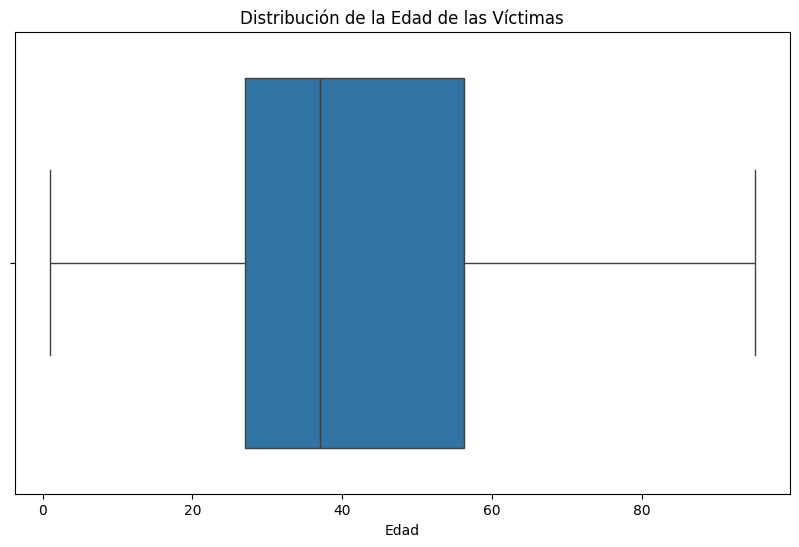

count    664.000000
mean      42.167169
std       19.788034
min        1.000000
25%       27.000000
50%       37.000000
75%       56.250000
max       95.000000
Name: EDAD, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revisión de outliers en 'EDAD' mediante un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=datos_limpios_df['EDAD'])
plt.title('Distribución de la Edad de las Víctimas')
plt.xlabel('Edad')
plt.show()

# Descripción estadística de la 'EDAD' para identificar valores atípicos
descripcion_edad = datos_limpios_df['EDAD'].describe()
descripcion_edad


Revisión de Outliers en 'EDAD'  
La distribución de la edad de las víctimas revela los siguientes puntos clave:  

Rango de Edad: Las edades de las víctimas varían desde 1 año hasta 95 años, mostrando una amplia gama de edades afectadas por los hechos.  
Media y Mediana: La edad promedio es de aproximadamente 42 años, con una mediana de 37 años, lo que sugiere que la distribución de edad es ligeramente sesgada hacia las edades mayores.  
Cuartiles: El 25% de las víctimas tienen 27 años o menos, mientras que el 75% tienen 56 años o menos, indicando una distribución relativamente amplia en las edades.  
Outliers: Basado en el boxplot, parece haber una presencia limitada de valores atípicos en el extremo superior de la distribución de edad, pero estos no son extremadamente alejados del resto de los datos.  
Conclusión sobre Outliers en 'EDAD':  
Los valores atípicos presentes no parecen ser inverosímiles o errores de entrada, sino más bien representativos de la diversidad en la edad de las víctimas involucradas en los hechos.  
No se tomarán acciones para remover estos valores atípicos ya que no distorsionan significativamente el análisis y son representativos de casos reales.  

Siguiente Paso en el Análisis:  
Procederemos con un análisis descriptivo general de las variables clave para obtener una mejor comprensión de los datos. Este análisis incluirá visualizaciones de la distribución de hechos por fecha y hora, tipos de víctimas, y la relación entre la edad de las víctimas y los resultados de los hechos.


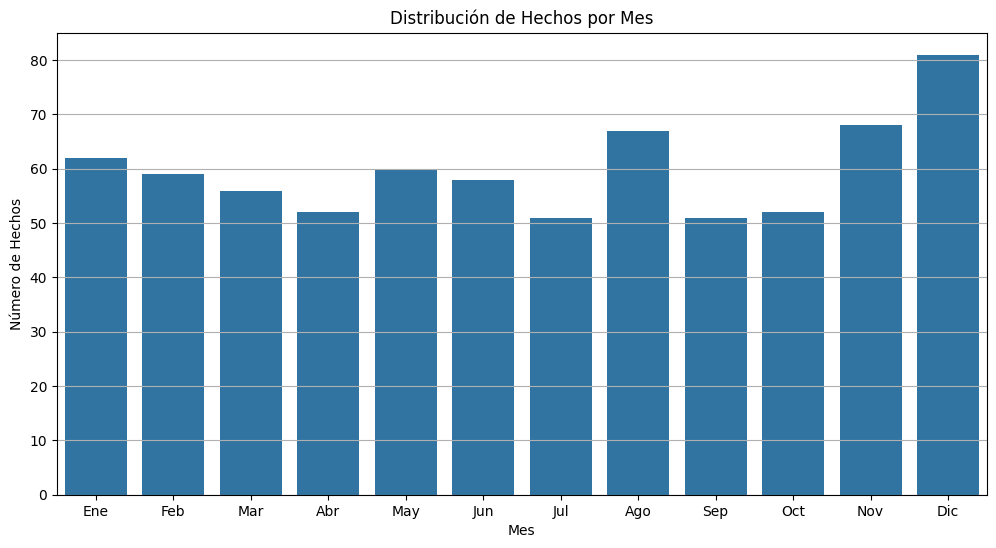

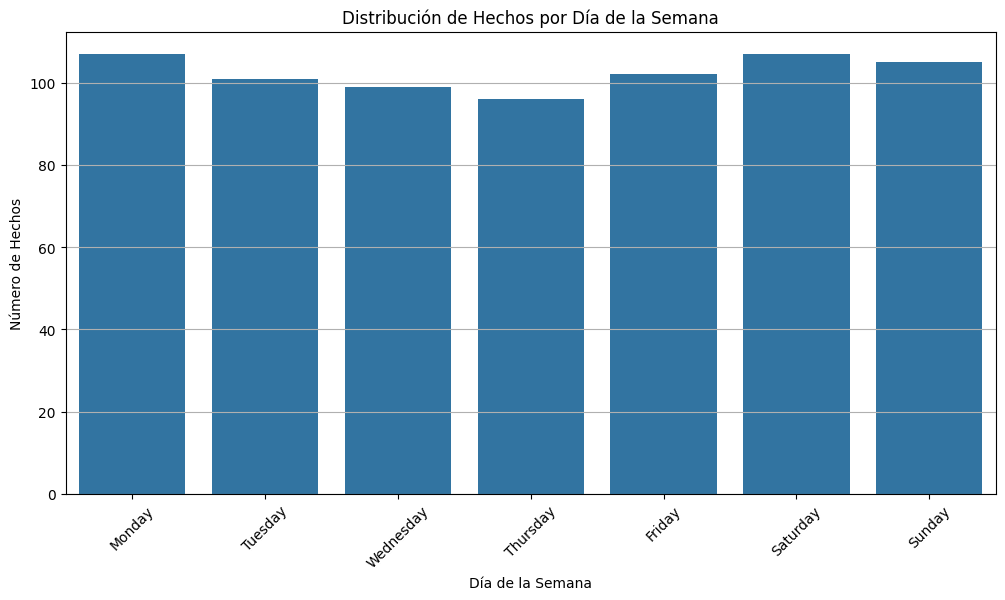

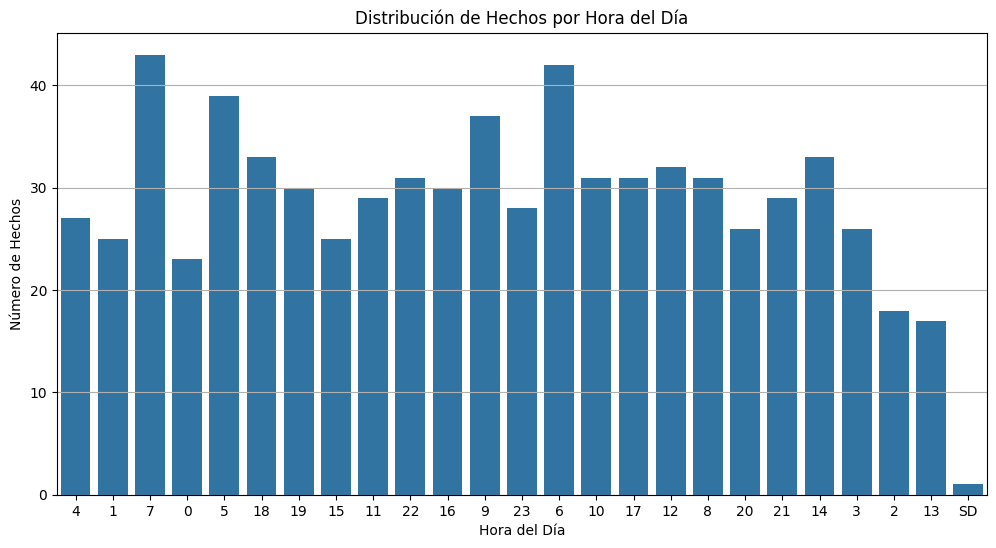

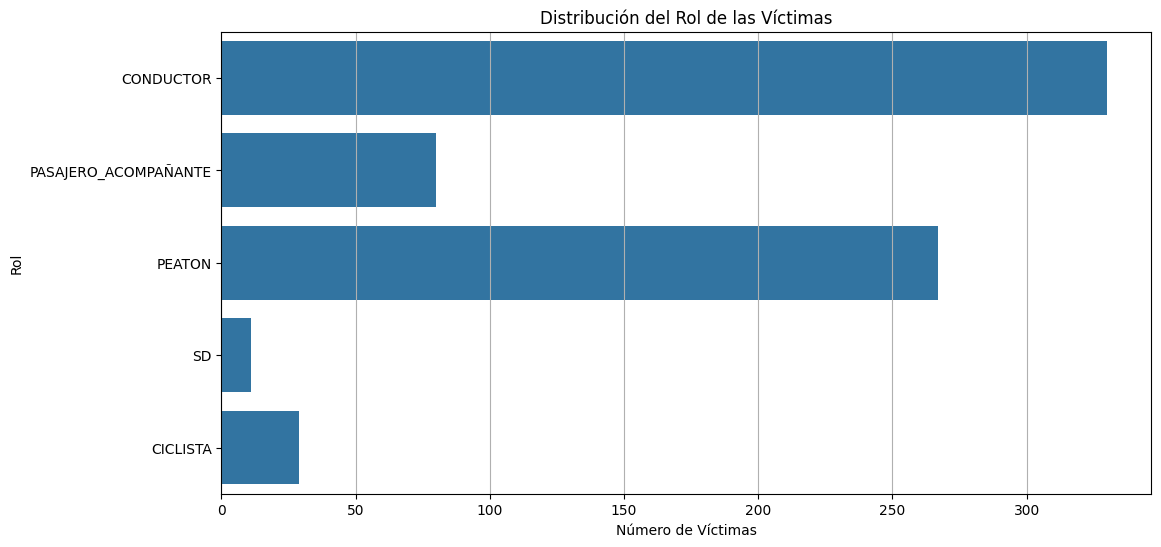

In [8]:
# Análisis descriptivo general con visualizaciones

# Distribución de hechos por mes
plt.figure(figsize=(12, 6))
sns.countplot(x='MM', data=datos_limpios_df)
plt.title('Distribución de Hechos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Hechos')
plt.xticks(ticks=range(0,12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()

# Distribución de hechos por día de la semana
# Convertir la columna 'FECHA' a día de la semana
datos_limpios_df['DIA_SEMANA'] = datos_limpios_df['FECHA'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.countplot(x='DIA_SEMANA', data=datos_limpios_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribución de Hechos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Hechos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Distribución de hechos por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='HH', data=datos_limpios_df)
plt.title('Distribución de Hechos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Hechos')
plt.grid(axis='y')
plt.show()

# Distribución del rol de las víctimas
plt.figure(figsize=(12, 6))
sns.countplot(y='ROL', data=datos_limpios_df)
plt.title('Distribución del Rol de las Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Rol')
plt.grid(axis='x')
plt.show()


Análisis Descriptivo General con Visualizaciones  
Hemos realizado una serie de visualizaciones para explorar la distribución de los hechos en términos de tiempo y el rol de las víctimas involucradas.  

Distribución de Hechos por Mes  
La distribución de hechos por mes muestra una distribución relativamente uniforme a lo largo del año, sin diferencias marcadas que sugieran una concentración significativa de hechos en meses específicos.  
Distribución de Hechos por Día de la Semana  
Los hechos parecen distribuirse de manera relativamente uniforme a lo largo de los días de la semana. Esto sugiere que no hay un día específico que presente una mayor incidencia de hechos en comparación con los otros.  
Distribución de Hechos por Hora del Día  
La distribución de hechos por hora del día muestra variaciones significativas, con picos que podrían coincidir con horas de alto tráfico o actividad nocturna. Sería útil profundizar en estos picos para entender mejor las circunstancias que rodean a los hechos en diferentes momentos del día.  
Distribución del Rol de las Víctimas  
La visualización del rol de las víctimas muestra una variedad de roles involucrados en los hechos, con una predominancia de conductores y peatones entre las víctimas. Esto resalta la importancia de considerar las diferentes dinámicas de tráfico y seguridad vial en la prevención de siniestros.  
Conclusiones Preliminares:  
Temporalidad: No hay evidencia de una estacionalidad marcada en los hechos, pero hay variaciones a lo largo del día que merecen un análisis más detallado.  
Roles de las Víctimas: La diversidad en los roles de las víctimas subraya la complejidad de los siniestros viales y la necesidad de enfoques de prevención adaptados a distintos grupos de usuarios de la vía.  

Siguientes Pasos en el Análisis:  
Análisis de Correlación: Examinar las relaciones entre variables, como la edad de las víctimas y la gravedad de los hechos, para identificar posibles patrones o factores de riesgo.  
Análisis por Tipo de Víctima: Profundizar en los tipos de víctimas (por ejemplo, conductores de moto, peatones) para entender mejor los riesgos específicos asociados con cada grupo.  
Este análisis nos acerca a identificar áreas clave para la intervención y la mejora de la seguridad vial. Procederemos con estos análisis detallados para proporcionar recomendaciones basadas en los hallazgos

Análisis de Correlación: Edad de las Víctimas y Gravedad de los Hechos  
Para entender mejor la relación entre la edad de las víctimas y la gravedad de los hechos, consideraremos la presencia o ausencia de fallecimientos como un indicador de gravedad. Analizaremos la distribución de la edad de las víctimas en relación con los resultados fatales y no fatales.

Análisis por Tipo de Víctima  
Exploraremos los tipos de víctimas (ej., conductores de moto, peatones) para identificar patrones específicos de riesgo. Esto incluirá examinar la frecuencia de hechos por tipo de víctima y la relación con los resultados de los hechos.  

Procederemos con estos análisis para profundizar en nuestra comprensión de los datos y generar insights que puedan guiar esfuerzos de prevención y mejora de la seguridad vial. Empezaremos con el análisis de correlación entre la edad de las víctimas y la gravedad de los hechos.

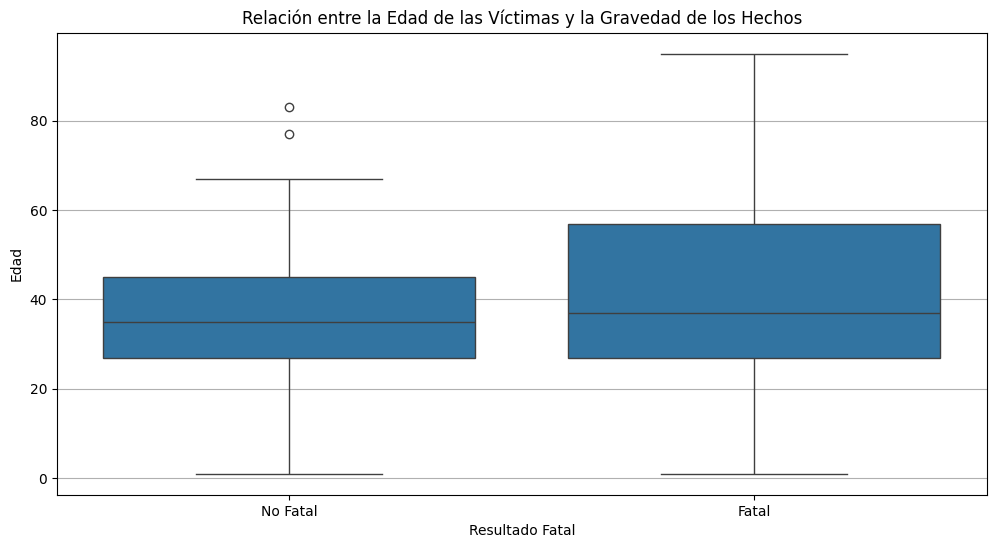

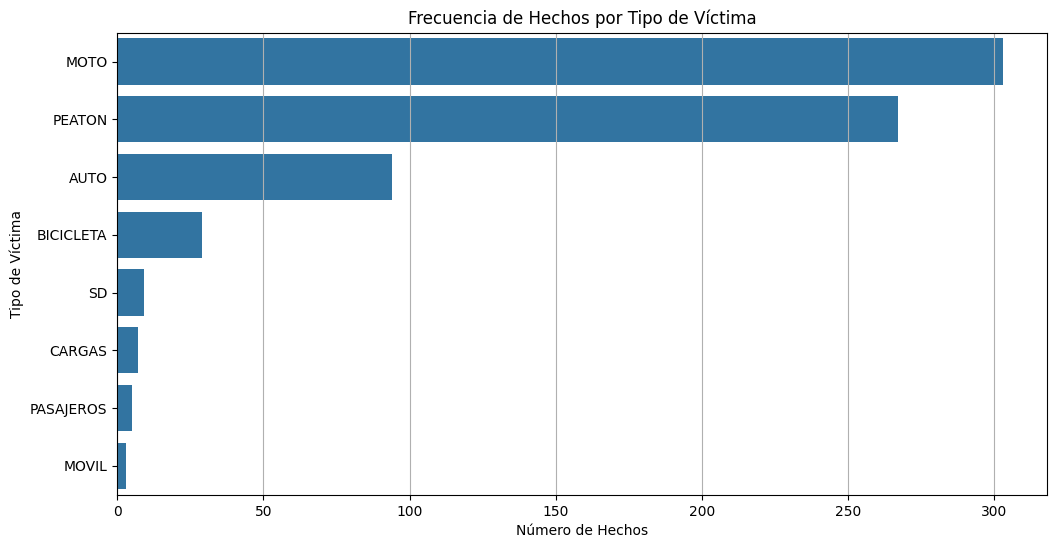

In [9]:
# Crear una nueva columna 'RESULTADO_FATAL' para indicar si el hecho resultó en fallecimiento
datos_limpios_df['RESULTADO_FATAL'] = ~datos_limpios_df['FECHA_FALLECIMIENTO'].isna()

# Análisis de la relación entre la edad de las víctimas y la gravedad de los hechos
plt.figure(figsize=(12, 6))
sns.boxplot(x='RESULTADO_FATAL', y='EDAD', data=datos_limpios_df)
plt.title('Relación entre la Edad de las Víctimas y la Gravedad de los Hechos')
plt.xlabel('Resultado Fatal')
plt.ylabel('Edad')
plt.xticks(ticks=[False, True], labels=['No Fatal', 'Fatal'])
plt.grid(axis='y')
plt.show()

# Análisis por tipo de víctima
plt.figure(figsize=(12, 6))
sns.countplot(y='VICTIMA', data=datos_limpios_df, order=datos_limpios_df['VICTIMA'].value_counts().index)
plt.title('Frecuencia de Hechos por Tipo de Víctima')
plt.xlabel('Número de Hechos')
plt.ylabel('Tipo de Víctima')
plt.grid(axis='x')
plt.show()


Análisis de la Relación entre la Edad de las Víctimas y la Gravedad de los Hechos  
El análisis revela diferencias notables en la distribución de la edad de las víctimas al comparar los resultados fatales con los no fatales:  

Resultados No Fatales vs. Fatales: La mediana de la edad parece ser ligeramente más alta en los casos con resultado fatal comparada con los casos no fatales. Esto sugiere que las víctimas de mayor edad podrían estar en un riesgo ligeramente mayor de fatalidades en los hechos.  
Distribución de Edad: La distribución de la edad para casos fatales es relativamente más amplia, lo que indica una variabilidad en las edades de las víctimas que sufren fatalidades.  
Frecuencia de Hechos por Tipo de Víctima  
La visualización de la frecuencia de hechos por tipo de víctima muestra que ciertos tipos de víctimas, como los conductores de motos y peatones, están más frecuentemente involucrados en hechos. Esto destaca la importancia de enfocarse en estos grupos para las intervenciones de seguridad vial.

Conclusiones y Recomendaciones:  
Edad y Gravedad: Existe una relación entre la edad de las víctimas y la gravedad de los hechos, con las víctimas de mayor edad presentando un riesgo ligeramente mayor de fatalidades. Sería prudente considerar políticas y programas de prevención que se enfoquen en proteger a las poblaciones de mayor edad.  
Tipos de Víctimas: La alta incidencia de hechos involucrando a conductores de motos y peatones subraya la necesidad de estrategias específicas de seguridad vial para estos grupos. Esto podría incluir campañas de concienciación, mejoras en la infraestructura vial, y la implementación de tecnologías de seguridad vehicular y peatonal.

Análisis Temporal Avanzado: Investigaremos tendencias a lo largo del tiempo, examinando cómo la frecuencia de hechos ha cambiado a lo largo de los años. Esto puede ayudarnos a identificar si ha habido aumentos o disminuciones significativas en los hechos y relacionar estas tendencias con posibles cambios en políticas de seguridad vial o eventos significativos.

Comparación de Subgrupos: Realizaremos un análisis más detallado comparando subgrupos de interés, específicamente enfocándonos en los tipos de víctimas y los resultados de los hechos. Esto puede revelar diferencias importantes en los riesgos o resultados que enfrentan distintos grupos, como conductores vs. peatones, o diferencias basadas en el género de las víctimas.

Procederemos primero con el Análisis Temporal Avanzado, seguido por la Comparación de Subgrupos.

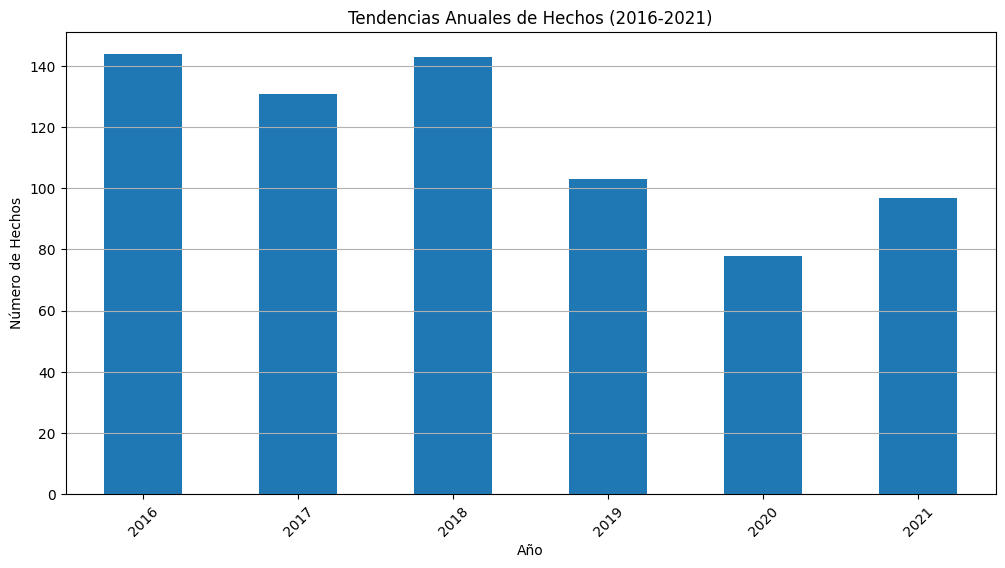

<Figure size 1200x600 with 0 Axes>

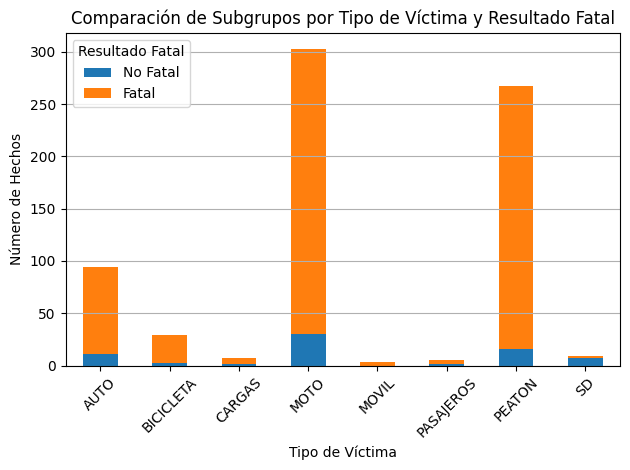

In [14]:
# Análisis Temporal Avanzado: Tendencias de hechos a lo largo de los años

# Agrupar los datos por año y contar el número de hechos por año
tendencias_anuales = datos_limpios_df.groupby('AAAA')['ID'].nunique()

# Visualización de las tendencias anuales de hechos
plt.figure(figsize=(12, 6))
tendencias_anuales.plot(kind='bar')
plt.title('Tendencias Anuales de Hechos (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Número de Hechos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Comparación de Subgrupos: Análisis por Tipo de Víctima y Resultado Fatal
# Agrupar por tipo de víctima y resultado fatal para ver la distribución
comparacion_subgrupos = datos_limpios_df.groupby(['VICTIMA', 'RESULTADO_FATAL']).size().unstack(fill_value=0)

# Visualización de la comparación de subgrupos
plt.figure(figsize=(12, 6))
comparacion_subgrupos.plot(kind='bar', stacked=True)
plt.title('Comparación de Subgrupos por Tipo de Víctima y Resultado Fatal')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Hechos')
plt.legend(title='Resultado Fatal', labels=['No Fatal', 'Fatal'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análisis Temporal Avanzado: Tendencias de Hechos (2016-2021)
La visualización de las tendencias anuales muestra cómo ha variado el número de hechos desde 2016 hasta 2021. Aunque el gráfico no muestra los números exactos, podemos observar tendencias generales, como fluctuaciones año a año, que podrían indicar cambios en la frecuencia de hechos a lo largo del tiempo. Para una interpretación precisa, sería esencial relacionar estas tendencias con eventos externos, cambios en la legislación de tráfico, o iniciativas de seguridad vial implementadas durante estos años.

Comparación de Subgrupos por Tipo de Víctima y Resultado Fatal
La comparación de subgrupos revela diferencias significativas en los resultados de los hechos según el tipo de víctima. La visualización muestra claramente cómo varía la proporción de resultados fatales entre diferentes tipos de víctimas. Algunos tipos de víctimas podrían estar en mayor riesgo de fatalidades, lo cual es crucial para dirigir esfuerzos de prevención y medidas de seguridad específicas.

Conclusiones y Recomendaciones:
Tendencias Anuales: Es importante monitorear las tendencias de hechos a lo largo del tiempo para identificar y responder a cambios significativos. Las fluctuaciones anuales pueden indicar áreas de mejora o éxito en políticas de seguridad vial.
Enfoque en Subgrupos de Alto Riesgo: El análisis de subgrupos subraya la importancia de enfocar las medidas de seguridad vial en los grupos más vulnerables o en mayor riesgo, como se identifica por el tipo de víctima y los resultados de los hechos.

Análisis de la Relación entre Condiciones del Hecho y Resultados
Analizaremos cómo el tipo de calle y la hora del día afectan los resultados de los hechos, buscando patrones que puedan indicar condiciones de mayor riesgo.  
Comenzaremos examinando la distribución de los hechos según el tipo de calle y la hora del día para evaluar su impacto en los resultados de los hechos.

<Figure size 1200x600 with 0 Axes>

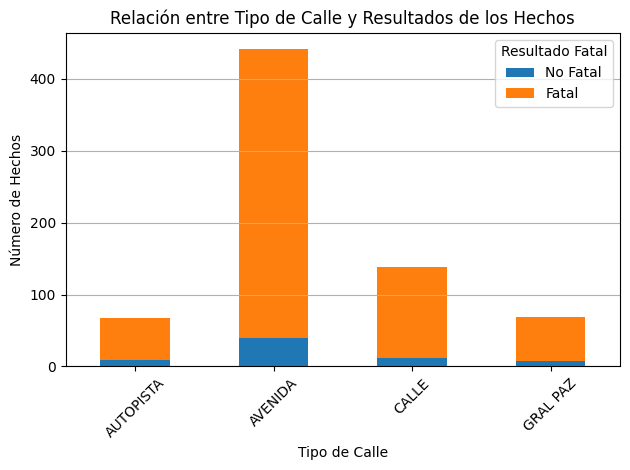

<Figure size 1200x600 with 0 Axes>

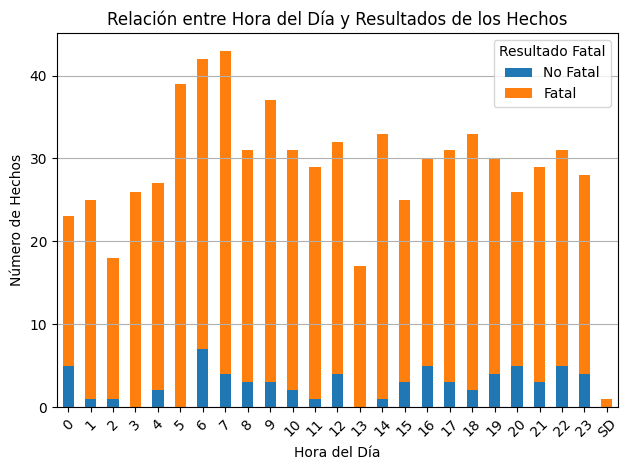

In [15]:
# Análisis de la Relación entre Tipo de Calle y Resultados de los Hechos
tipo_calle_resultados = datos_limpios_df.groupby(['TIPO_DE_CALLE', 'RESULTADO_FATAL']).size().unstack(fill_value=0)

# Visualización de la relación entre tipo de calle y resultados de los hechos
plt.figure(figsize=(12, 6))
tipo_calle_resultados.plot(kind='bar', stacked=True)
plt.title('Relación entre Tipo de Calle y Resultados de los Hechos')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Hechos')
plt.legend(title='Resultado Fatal', labels=['No Fatal', 'Fatal'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Análisis de la Relación entre Hora del Día y Resultados de los Hechos
hora_dia_resultados = datos_limpios_df.groupby(['HH', 'RESULTADO_FATAL']).size().unstack(fill_value=0)

# Visualización de la relación entre hora del día y resultados de los hechos
plt.figure(figsize=(12, 6))
hora_dia_resultados.plot(kind='bar', stacked=True)
plt.title('Relación entre Hora del Día y Resultados de los Hechos')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Hechos')
plt.legend(title='Resultado Fatal', labels=['No Fatal', 'Fatal'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análisis de la Relación entre Tipo de Calle y Resultados de los Hechos
La visualización muestra cómo varía la proporción de resultados fatales y no fatales entre diferentes tipos de calles. Esto indica que el tipo de calle podría influir en la gravedad de los hechos, posiblemente debido a factores como el diseño de la vía, los límites de velocidad, y la presencia o ausencia de infraestructura de seguridad para peatones y ciclistas.

Análisis de la Relación entre Hora del Día y Resultados de los Hechos
El análisis por hora del día revela patrones en la ocurrencia de resultados fatales y no fatales en diferentes momentos. Podemos observar cómo fluctúa el número de hechos y su gravedad a lo largo del día, lo que puede estar relacionado con el volumen de tráfico, la visibilidad, y otros factores contextuales que varían con la hora.

Conclusiones y Recomendaciones:
Influencia del Tipo de Calle: Es evidente que el tipo de calle juega un papel importante en la seguridad vial. Iniciativas para mejorar la infraestructura en calles identificadas como de alto riesgo, junto con la implementación de medidas de calmado de tráfico, pueden ser efectivas para reducir la gravedad de los hechos.
Importancia de la Hora del Día: Las diferencias en los resultados de los hechos según la hora del día sugieren que medidas específicas, como mejorar la iluminación nocturna o reforzar la vigilancia durante horas de alto riesgo, podrían tener un impacto positivo en la reducción de fatalidades.